# Introduction:
In the retail industry, understanding sales trends, customer behavior, and product performance is vital for making informed decisions. This project focuses on performing Exploratory Data Analysis (EDA) on a retail sales dataset to uncover insights that can guide business strategies. The dataset includes key variables such as transaction IDs, customer demographics, product categories, and sales data.
Through EDA, we aim to identify patterns in customer purchasing behavior, analyze sales trends over time, and evaluate the performance of various product categories. Techniques like descriptive statistics, time series analysis, and data visualization will be used to reveal actionable insights. The findings will help businesses optimize inventory management, improve marketing efforts, and tailor product offerings to better meet customer demands.
The goal of this analysis is to provide data-driven recommendations that can help the retail business enhance decision-making and boost overall performance.

# Step 1: Data Loading and Cleaning

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np

# Load the dataset
file_path = "retail_sales_dataset.csv"  
data = pd.read_csv(file_path)

data


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [2]:
# Overview of the data
print("Dataset Overview:")
print(data.head())
print("\nDataset Information:")
print(data.info())



Dataset Overview:
   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1

In [3]:
# Check for missing values
print("\nMissing Values in Dataset:")
print(data.isnull().sum())

# Handle missing values (if any)
data.fillna(0, inplace=True)  # Example: Fill missing values with 0

# Drop duplicates
data.drop_duplicates(inplace=True)

# Save cleaned dataset for future use
cleaned_file_path = "cleaned_dataset.csv"
data.to_csv(cleaned_file_path, index=False)
print(f"\nCleaned data saved to {cleaned_file_path}")


Missing Values in Dataset:
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

Cleaned data saved to cleaned_dataset.csv


# Step 2: Descriptive Statistics

In [4]:
# Descriptive statistics
print("\nDescriptive Statistics:")
print(data.describe())

# Example: Calculate specific statistics for 'Total Amount'
if 'Total Amount' in data.columns:
    mean_sales = data['Total Amount'].mean()
    median_sales = data['Total Amount'].median()
    mode_sales = data['Total Amount'].mode()[0]
    std_sales = data['Total Amount'].std()

    print(f"\nMean Total Amount: {mean_sales}")
    print(f"Median Total Amount: {median_sales}")
    print(f"Mode Total Amount: {mode_sales}")
    print(f"Standard Deviation of Total Amount: {std_sales}")



Descriptive Statistics:
       Transaction ID         Age     Quantity  Price per Unit  Total Amount
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
mean       500.500000    41.39200     2.514000      179.890000    456.000000
std        288.819436    13.68143     1.132734      189.681356    559.997632
min          1.000000    18.00000     1.000000       25.000000     25.000000
25%        250.750000    29.00000     1.000000       30.000000     60.000000
50%        500.500000    42.00000     3.000000       50.000000    135.000000
75%        750.250000    53.00000     4.000000      300.000000    900.000000
max       1000.000000    64.00000     4.000000      500.000000   2000.000000

Mean Total Amount: 456.0
Median Total Amount: 135.0
Mode Total Amount: 50
Standard Deviation of Total Amount: 559.997631555123


# Step 3: Time Series Analysis

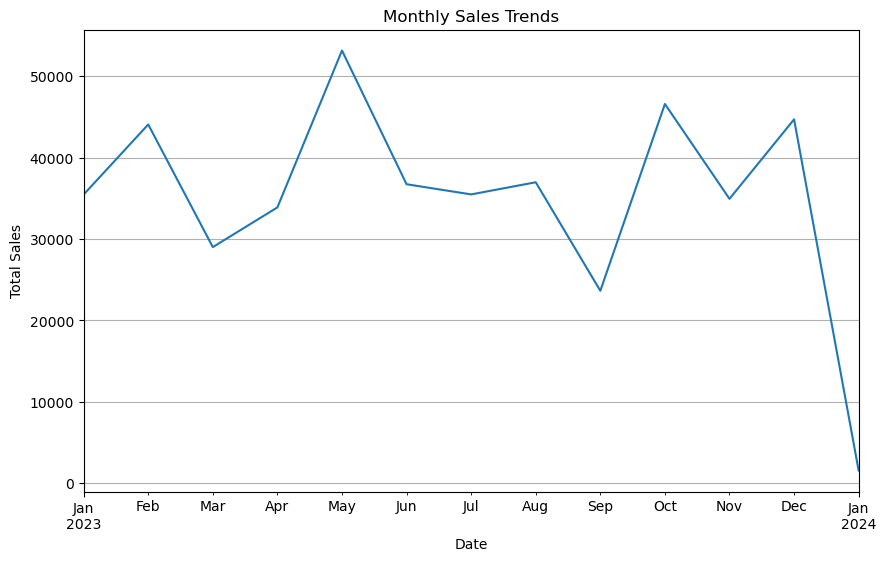

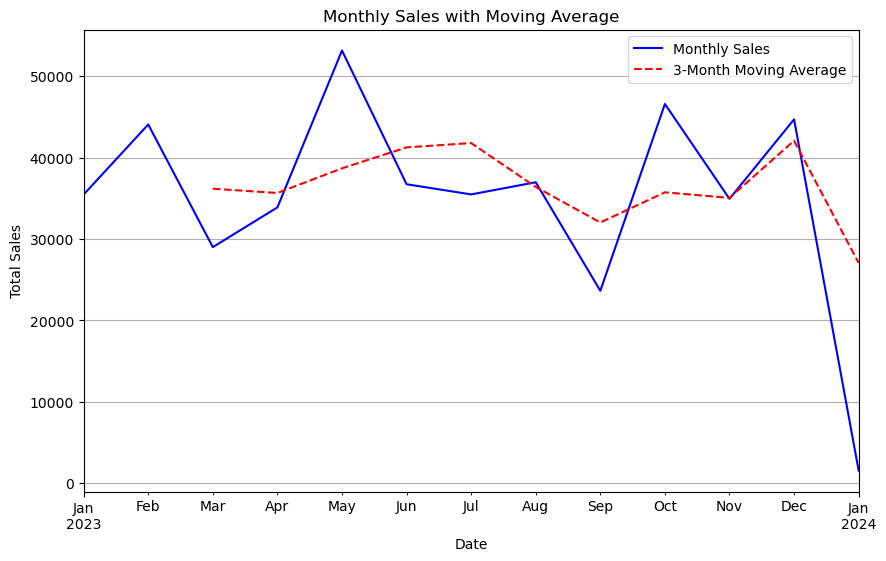

In [5]:
import matplotlib.pyplot as plt

# Ensure the date column is in datetime format (replace 'Date' with your actual column name)
if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'])

# Set the date column as the index
data.set_index('Date', inplace=True)

# Resample the data by month (you can change it to 'D' for daily, 'Y' for yearly, etc.)
monthly_sales = data['Total Amount'].resample('M').sum()  # 'M' for monthly aggregation

# Plotting the sales trends over time
plt.figure(figsize=(10, 6))
monthly_sales.plot()
plt.title('Monthly Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

# If you'd like to see a moving average trend (e.g., 3-month moving average):
monthly_sales_rolling = monthly_sales.rolling(window=3).mean()

# Plot the moving average
plt.figure(figsize=(10, 6))
monthly_sales.plot(label='Monthly Sales', color='blue')
monthly_sales_rolling.plot(label='3-Month Moving Average', color='red', linestyle='--')
plt.title('Monthly Sales with Moving Average')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.show()


In [6]:
data


,Transaction ID,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
Date,,,,,,,,
2023-11-24,1,CUST001,Male,34,Beauty,3,50,150
2023-02-27,2,CUST002,Female,26,Clothing,2,500,1000
2023-01-13,3,CUST003,Male,50,Electronics,1,30,30
2023-05-21,4,CUST004,Male,37,Clothing,1,500,500
2023-05-06,5,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...
2023-05-16,996,CUST996,Male,62,Clothing,1,50,50
2023-11-17,997,CUST997,Male,52,Beauty,3,30,90
2023-10-29,998,CUST998,Female,23,Beauty,4,25,100


# Step 4: Customer and Product Analysis

In [7]:
# Assuming 'Age' and 'Gender' columns are available for customer analysis

# Group by Age to analyze the average spending
if 'Age' in data.columns:
    age_group_sales = data.groupby('Age')['Total Amount'].sum()
    print("\nTotal Sales by Age:")
    print(age_group_sales)

# Gender analysis (if 'Gender' column exists)
if 'Gender' in data.columns:
    gender_sales = data.groupby('Gender')['Total Amount'].sum()
    print("\nTotal Sales by Gender:")
    print(gender_sales)

# If there's a 'Product Category' column, we can analyze top-selling products
if 'Product Category' in data.columns:
    category_sales = data.groupby('Product Category')['Total Amount'].sum()
    top_categories = category_sales.sort_values(ascending=False).head(10)  # Top 10 categories
    print("\nTop 10 Product Categories by Total Sales:")
    print(top_categories)

# If you want to analyze the most purchased products
if 'Product' in data.columns:
    product_sales = data.groupby('Product')['Total Amount'].sum()
    top_products = product_sales.sort_values(ascending=False).head(10)  # Top 10 products
    print("\nTop 10 Products by Total Sales:")
    print(top_products)



Total Sales by Age:
Age
18    11215
19    14870
20     8645
21    12585
22    13700
23     8220
24     5415
25     9900
26    13980
27     9385
28     8670
29     6570
30     9790
31    10220
32     5550
33     6240
34    16785
35    11290
36     9105
37    11650
38    11100
39     4595
40     9415
41     5650
42     8500
43    17970
44     7560
45     6325
46    13090
47    12505
48     7240
49     5110
50     9845
51    16065
52     7040
53     9510
54    10505
55     9780
56     9440
57     9290
58     7395
59     9470
60    11590
61     6730
62     8120
63     9250
64     9125
Name: Total Amount, dtype: int64

Total Sales by Gender:
Gender
Female    232840
Male      223160
Name: Total Amount, dtype: int64

Top 10 Product Categories by Total Sales:
Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Total Amount, dtype: int64


# Step 5: Visualization

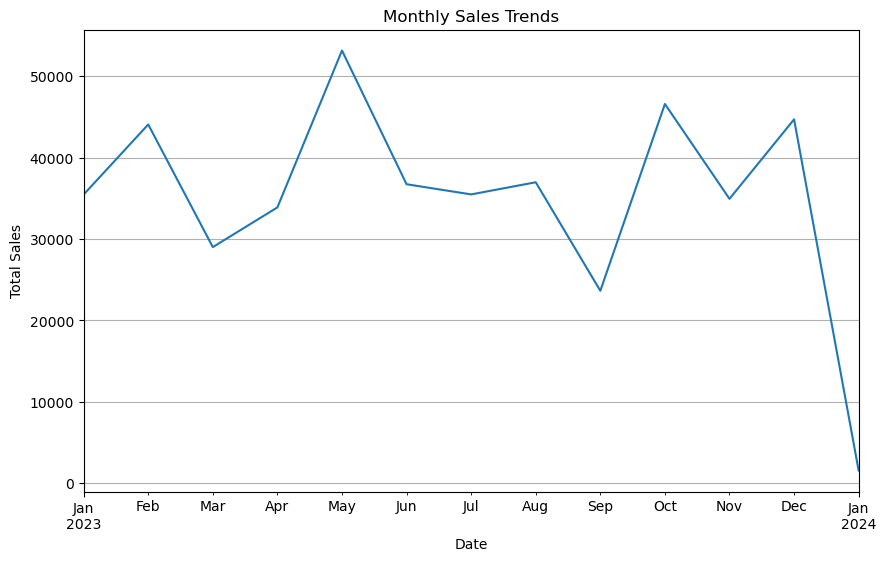

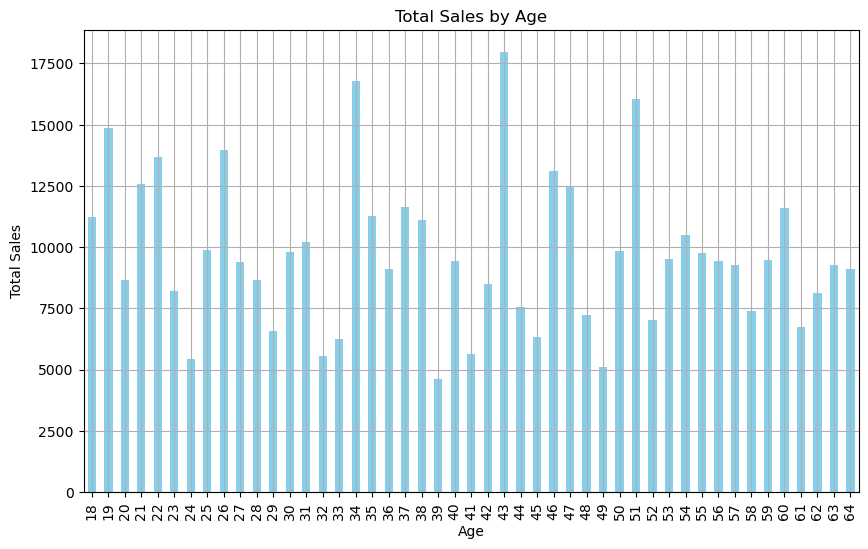

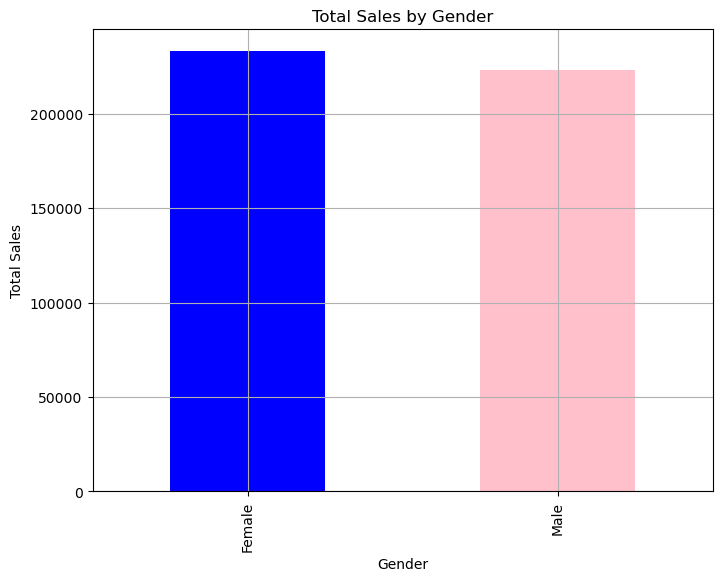

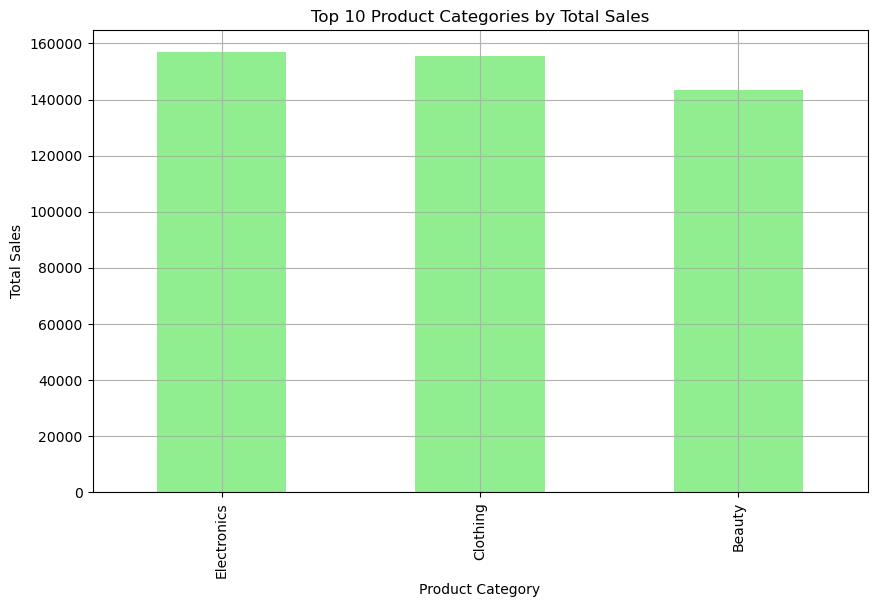

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Sales Trends Over Time (Line Plot)
plt.figure(figsize=(10, 6))
monthly_sales.plot()
plt.title('Monthly Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

# 2. Total Sales by Age (Bar Plot)
if 'Age' in data.columns:
    age_group_sales = data.groupby('Age')['Total Amount'].sum()
    plt.figure(figsize=(10, 6))
    age_group_sales.plot(kind='bar', color='skyblue')
    plt.title('Total Sales by Age')
    plt.xlabel('Age')
    plt.ylabel('Total Sales')
    plt.grid(True)
    plt.show()

# 3. Total Sales by Gender (Bar Plot)
if 'Gender' in data.columns:
    gender_sales = data.groupby('Gender')['Total Amount'].sum()
    plt.figure(figsize=(8, 6))
    gender_sales.plot(kind='bar', color=['blue', 'pink'])
    plt.title('Total Sales by Gender')
    plt.xlabel('Gender')
    plt.ylabel('Total Sales')
    plt.grid(True)
    plt.show()

# 4. Top Product Categories by Total Sales (Bar Plot)
if 'Product Category' in data.columns:
    category_sales = data.groupby('Product Category')['Total Amount'].sum()
    top_categories = category_sales.sort_values(ascending=False).head(10)
    plt.figure(figsize=(10, 6))
    top_categories.plot(kind='bar', color='lightgreen')
    plt.title('Top 10 Product Categories by Total Sales')
    plt.xlabel('Product Category')
    plt.ylabel('Total Sales')
    plt.grid(True)
    plt.show()

# 5. Top Products by Total Sales (Bar Plot)
if 'Product' in data.columns:
    product_sales = data.groupby('Product')['Total Amount'].sum()
    top_products = product_sales.sort_values(ascending=False).head(10)
    plt.figure(figsize=(10, 6))
    top_products.plot(kind='bar', color='orange')
    plt.title('Top 10 Products by Total Sales')
    plt.xlabel('Product')
    plt.ylabel('Total Sales')
    plt.grid(True)
    plt.show()


# 6 Recommendations: Provide actionable recommendations based on the EDA.
To boost sales and customer engagement, focus on targeting the 26–40 age group and implement gender-specific promotions. Optimize inventory and marketing for high-performing categories like "Clothing," "Electronics," and "Beauty," while offering discounts on slow-moving products. Engage high-value customers with loyalty programs and exclusive offers to enhance retention. Address seasonal dips by analyzing low-performing months and running targeted campaigns.
Promote top-selling products by bundling them with complementary items to increase transaction size. Improve sales forecasting by analyzing trends, and optimize stock levels accordingly. Expand data collection (e.g., location, purchase frequency) for deeper insights into customer behavior. Lastly, introduce promotions like discounts or flash sales to maintain revenue consistency during low-activity periods. These strategies can drive growth and optimize operations.